In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
excel_file='CoronavirusFaelleBW.xlsx'
dfi=pd.read_excel(excel_file,sheet_name='Infizierte Coronavirus in BW',header=None)
dft=pd.read_excel(excel_file,sheet_name='Todesfälle Coronavirus in BW',header=None)
kreis_file='Kreise.xlsx'
dfl=pd.read_excel(kreis_file,sheet_name='Landkreise',header=None)
einwohnerzahl=1.107e7

In [36]:
ctyI=np.nan_to_num(np.asarray(dfi))
ctyT=np.nan_to_num(np.asarray(dft))
ctyL=dfl.to_dict()
kreise=ctyL.get(0)
kreis={value:key for key,value in kreise.items()}

<IPython.core.display.Javascript object>


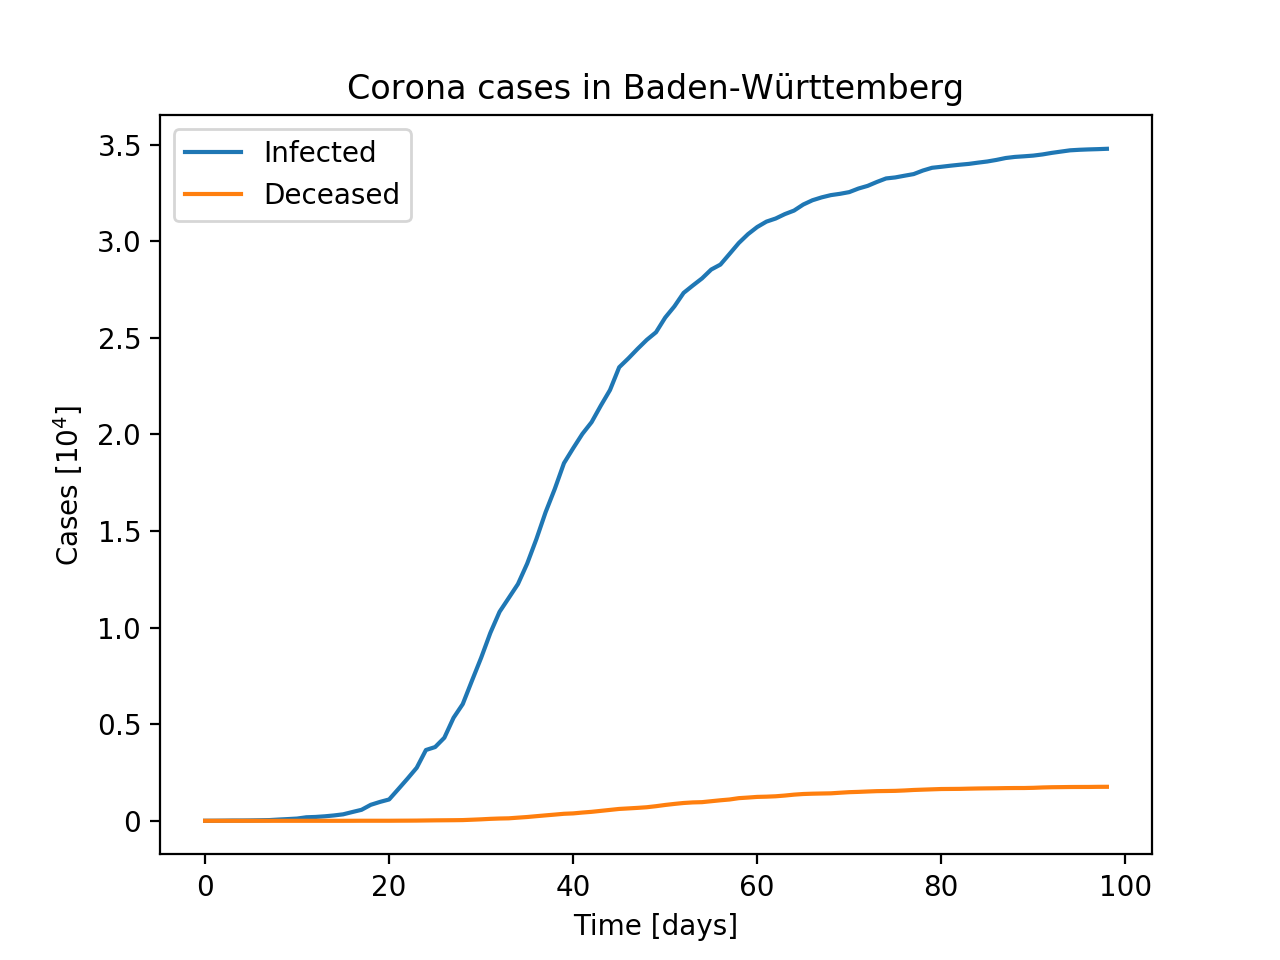

In [37]:
%matplotlib notebook
#proT=1000./einwohnerzahl
proT=1.
yI=np.flip(np.sum(ctyI,axis=0))
yT=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
plt.plot(yI*proT,label='Infected')
plt.plot(yT*proT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Cases [$10^4$]')
plt.yticks([0,0.5e4,1.e4,1.5e4,2.0e4,2.5e4,3.0e4,3.5e4],['0','$0.5$','$1.0$','$1.5$',
                                                         '$2.0$','$2.5$','$3.0$','$3.5$'])
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('BWCases.png')

<IPython.core.display.Javascript object>


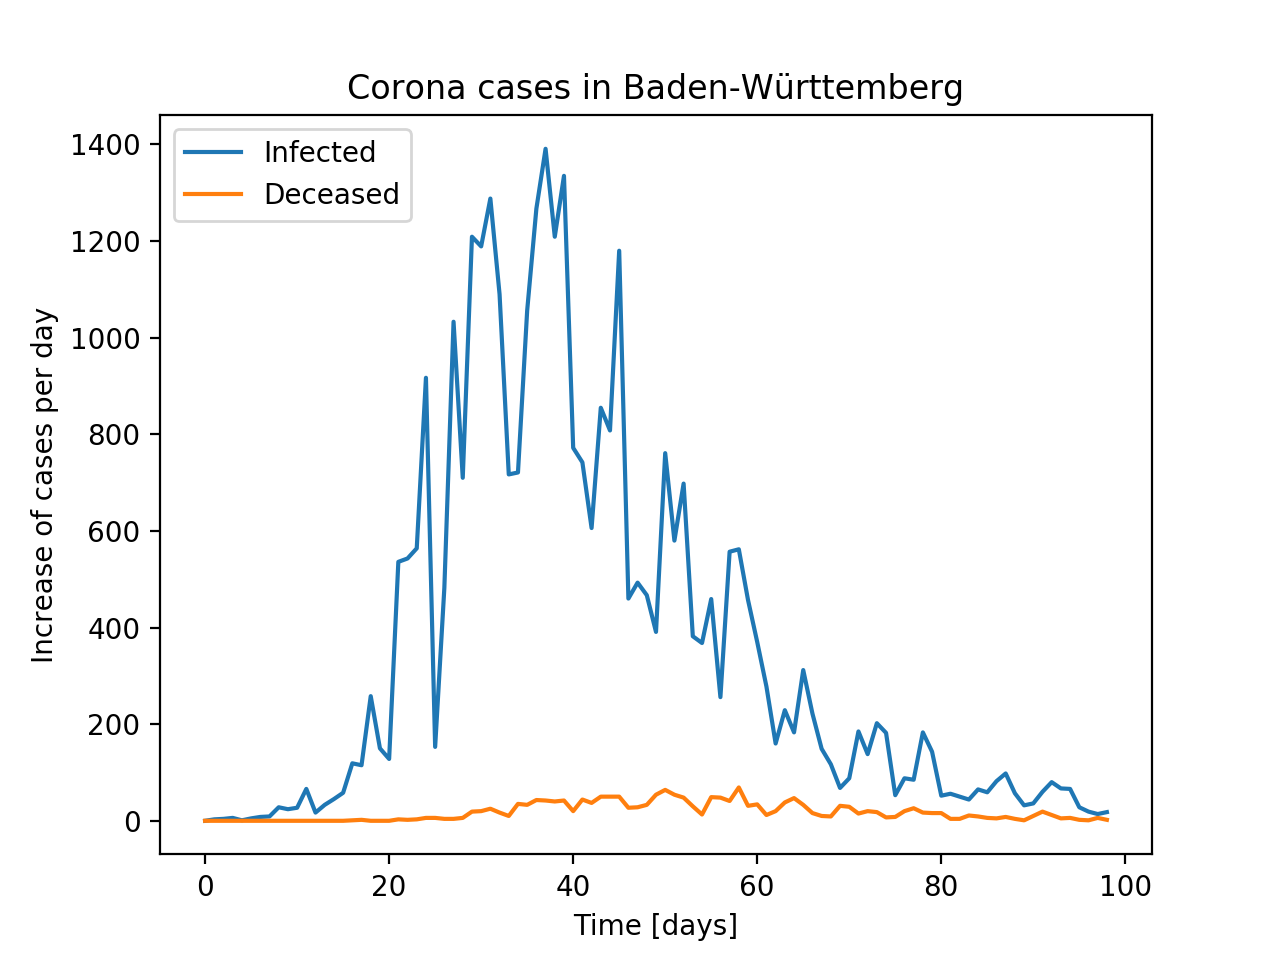

In [38]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [ ]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [26]:
yT[-1]/yI[-1]

0.04957165674459126

In [39]:
ctyL

{0: {0: 'Alb-Donau-Kreis',
  1: 'Baden-Baden (Stadtkreis)',
  2: 'Biberach',
  3: 'Böblingen',
  4: 'Bodenseekreis',
  5: 'Breisgau-Hochschwarzwald',
  6: 'Calw',
  7: 'Emmendingen',
  8: 'Enzkreis',
  9: 'Esslingen',
  10: 'Freiburg im Breisgau (Stadtkreis)',
  11: 'Freudenstadt',
  12: 'Göppingen',
  13: 'Heidelberg (Stadtkreis)',
  14: 'Heidenheim',
  15: 'Heilbronn',
  16: 'Heilbronn (Stadtkreis)',
  17: 'Hohenlohekreis',
  18: 'Karlsruhe',
  19: 'Karlsruhe (Stadtkreis)',
  20: 'Konstanz',
  21: 'Lörrach',
  22: 'Ludwigsburg',
  23: 'Main-Tauber-Kreis',
  24: 'Mannheim (Stadtkreis)',
  25: 'Neckar-Odenwald-Kreis',
  26: 'Ortenaukreis',
  27: 'Ostalbkreis',
  28: 'Pforzheim (Stadtkreis)',
  29: 'Rastatt',
  30: 'Ravensburg',
  31: 'Rems-Murr-Kreis',
  32: 'Reutlingen',
  33: 'Rhein-Neckar-Kreis',
  34: 'Rottweil',
  35: 'Schwäbisch Hall',
  36: 'Schwarzwald-Baar-Kreis',
  37: 'Sigmaringen',
  38: 'Stuttgart',
  39: 'Tübingen',
  40: 'Tuttlingen',
  41: 'Ulm (Stadtkreis)',
  42: 'Wal

<IPython.core.display.Javascript object>


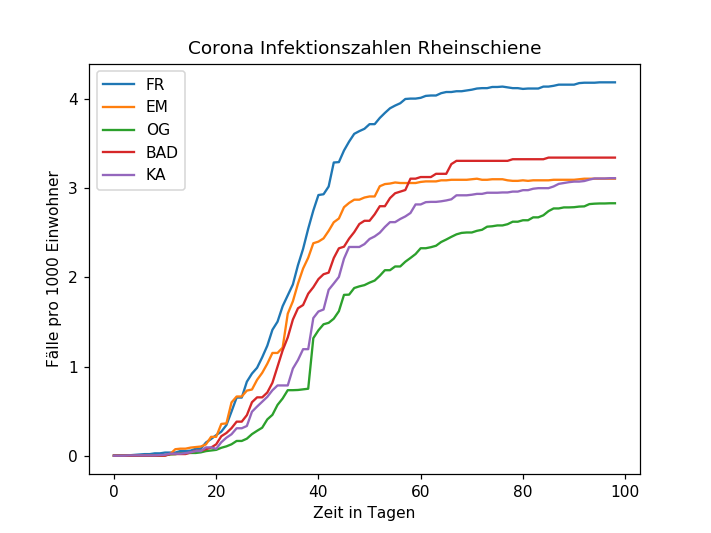

In [58]:
%matplotlib notebook
plt.plot(np.flip(ctyI[10])*EZFR,label='FR')
plt.plot(np.flip(ctyI[7])*EZEM,label='EM')
plt.plot(np.flip(ctyI[26])*EZOG,label='OG')
plt.plot(np.flip(ctyI[1])*EZBAD,label='BAD')
plt.plot(np.flip(ctyI[18])*EZKA,label='KA')
plt.ylabel('Fälle pro 1000 Einwohner')
plt.xlabel('Zeit in Tagen')
plt.legend()
plt.title('Corona Infektionszahlen Rheinschiene')
plt.savefig('FREMBADKA.png')

In [57]:
EZFR=1000/230219
EZEM=1000/165788
EZBAD=1000/55040
EZKA=1000/312305
EZOG=1000/430244

In [45]:
EZFR

0.0043436901385202785

In [51]:
yFR=np.flip(ctyI[10])

<IPython.core.display.Javascript object>


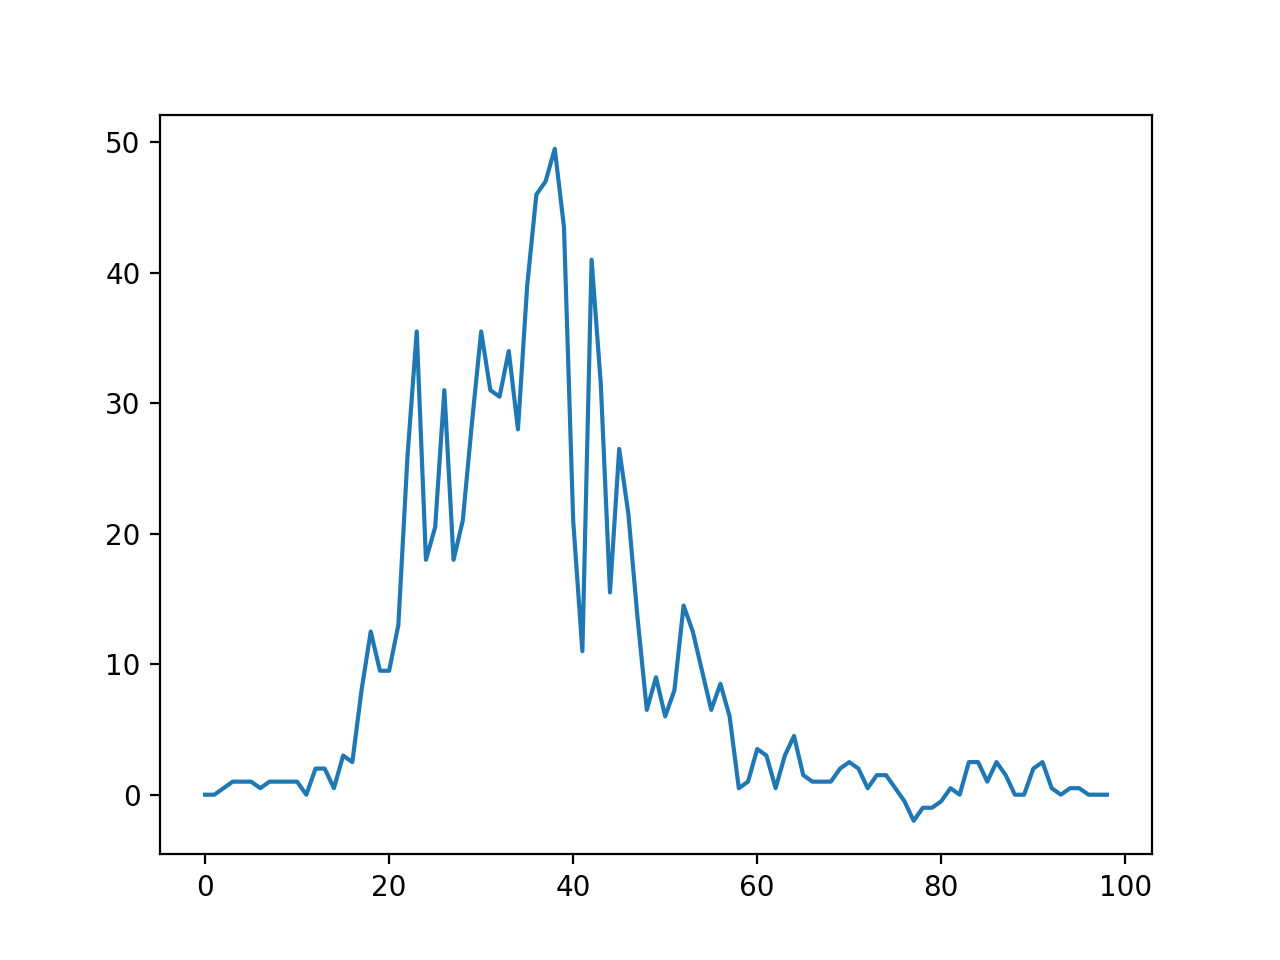

In [55]:
%matplotlib notebook
yFRder2=np.gradient(yFR,edge_order=2)
yFRder7=np.roll(yFR,3)+np.roll(yFR,3)+np.roll(yFR,3)+np.roll(yFR,3)+np.roll(yFR,3)+np.roll(yFR,3)
plt.plot(np.gradient(yFR,edge_order=2))

In [ ]:
m=